<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/024_Principal%20Component%20Analysis/024_PCA%20Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 24: Principal Component Analysis (PCA)

This notebook is a **practice-only notebook** for students.

### Instructions for Students
- Complete every **TODO** step by step.
- Run the cells after completing each TODO.
- Focus on *why* you are doing each step, not just *how*.

### Dataset Used
We use the **Breast Cancer Wisconsin dataset**, which is:
- Numeric
- Medium dimensional (30 features)
- Very suitable for PCA
- Common in real ML pipelines



## 1) Imports (Given)


In [35]:
#Given for you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## 2) Load the Dataset (TODO)

TODO:
- Load the breast cancer dataset using sklearn
- Create:
  - X: feature DataFrame
  - y: target Series
- Print the shape of X and y


In [3]:
# TODO: Load dataset
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

X.shape, y.shape

((569, 30), (569,))


## 3) Inspect Feature Scales (TODO)


In [4]:
# TODO: Inspect feature statistics
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744



## 4) Scale the Features (TODO)


In [5]:
# TODO: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+


## 5) Fit PCA Without Limiting Components (TODO)


In [29]:
# TODO: Fit full PCA and compute explained variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

explained[:13]

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525])

In [28]:
cum_explained[:10]

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881])


## 6) Explained Variance Plot (TODO)


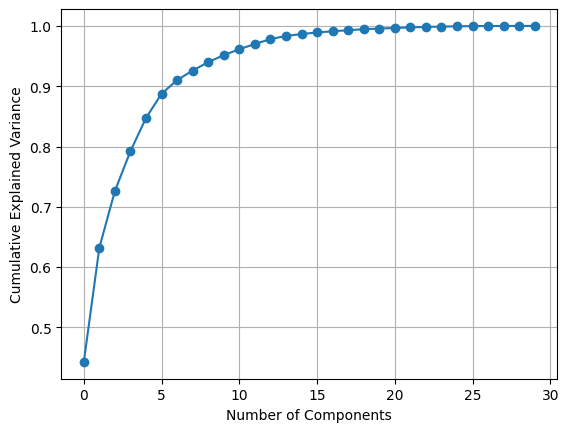

In [23]:
# TODO: Plot cumulative explained variance
plt.figure()
plt.plot(cum_explained, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


## 7) Choose Number of Components (TODO)


In [26]:
# TODO: Find k90 and k95 and k97
def components_for_threshold(cum_variance,threashold):
  return int(np.argmax(cum_variance>=threashold)+1)

k95 = components_for_threshold(cum_explained, 0.95)
print(k95)

k97 = components_for_threshold(cum_explained, 0.97)
print(k97)

10
12



## 8) Apply PCA with Chosen Components (TODO)


In [30]:
# TODO: Apply PCA with selected number of components
k = k95
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(569, 10)


## 9) Inspect Principal Components (TODO)


In [32]:
# TODO: Inspect PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(k)]
)

loadings.head(13)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
mean radius,0.218902,-0.233857,-0.008531,-0.041409,-0.037786,0.018741,-0.124088,-0.007452,-0.223110,0.095486
mean texture,0.103725,-0.059706,0.064550,0.603050,0.049469,-0.032179,0.011400,0.130675,0.112699,0.240934
mean perimeter,0.227537,-0.215181,-0.009314,-0.041983,-0.037375,0.017308,-0.114477,-0.018687,-0.223739,0.086386
mean area,0.220995,-0.231077,0.028700,-0.053434,-0.010331,-0.001888,-0.051653,0.034674,-0.195586,0.074956
mean smoothness,0.142590,0.186113,-0.104292,-0.159383,0.365089,-0.286374,-0.140669,-0.288975,0.006425,-0.069293
mean compactness,0.239285,0.151892,-0.074092,-0.031795,-0.011704,-0.014131,0.030918,-0.151396,-0.167841,0.012936
mean concavity,0.258400,0.060165,0.002734,-0.019123,-0.086375,-0.009344,-0.107520,-0.072827,0.040591,-0.135602
mean concave points,0.260854,-0.034768,-0.025564,-0.065336,0.043861,-0.052050,-0.150482,-0.152322,-0.111971,0.008055
mean symmetry,0.138167,0.190349,-0.040240,-0.067125,0.305941,0.356458,-0.093891,-0.231531,0.256040,0.572069
mean fractal dimension,0.064363,0.366575,-0.022574,-0.048587,0.044424,-0.119431,0.295760,-0.177121,-0.123741,0.081103



## 10) Visualize Data Using First Two Principal Components (TODO)


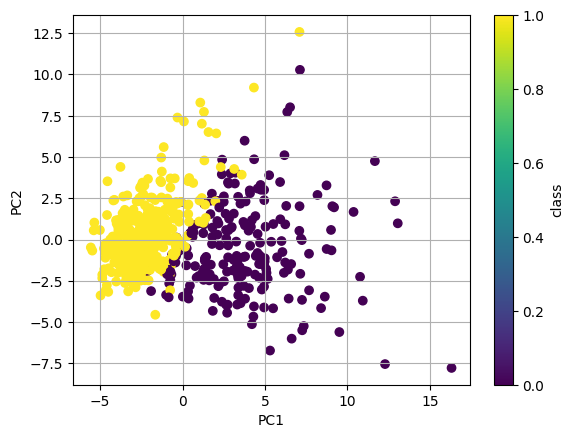

In [33]:
# TODO: 2D PCA visualization
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_scaled)

plt.figure()
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.colorbar(scatter, label="class")
plt.show()


## 11) PCA in a Model Pipeline (TODO)


In [36]:
# TODO: Model comparison with and without PCA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

pipe_no_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])

pipe_no_pca.fit(X_train, y_train)
pred_no_pca = pipe_no_pca.predict(X_test)

acc_no_pca = accuracy_score(y_test, pred_no_pca)
print("Accuracy (No PCA):", acc_no_pca)
print("\nClassification Report (NO PCA):\n")
print(classification_report(y_test, pred_no_pca))

Accuracy (No PCA): 0.986013986013986

Classification Report (NO PCA):

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [37]:
pipe_with_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("clf", LogisticRegression(max_iter=500))
])

pipe_with_pca.fit(X_train, y_train)
pred_with_pca = pipe_with_pca.predict(X_test)

acc_with_pca = accuracy_score(y_test, pred_with_pca)
print("Accuracy (with PCA):", acc_with_pca)
print("\nClassification Report (with PCA):\n")
print(classification_report(y_test, pred_with_pca))

Accuracy (with PCA): 0.9790209790209791

Classification Report (with PCA):

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143




## 12) Reflection Questions

Answer briefly in markdown:
1. Did PCA reduce the number of features significantly?
2. Did PCA improve, reduce, or maintain accuracy?
3. Would you use PCA for this dataset in a real project? Why or why not?


**1.**
Yes, PCA reduced the feature space from 30 original features to about 10 principal components while retaining around 95% of the variance, which is a significant reduction.

**2.**
PCA maintained the accuracy(with only a very small change). The model's performance after PCA was very close to the original accuracy, showing the reducing features did not significantly hurt predictive power.

**3.**
Yes, I would use PCA to reduce dimensionality and improve efficiency while maintaining accuracy. However, I might avoid it if interpretability of the original medical features is important.